## Decision Tree Classifier

**Karina Huang, Lipika Ramaswamy**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#import qii package
from unary_qii import individualOutcomes, groupDisparity

In [2]:
data = pd.read_csv('../data/data_final.csv', index_col = ['Unnamed: 0'])
#check data
data.head()

,id,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid
0,1,Male,69,Other,0,0,0,0,1,Low,0,1,Low,0,0
1,3,Male,34,African-American,0,0,0,0,3,Low,1,1,Low,1,1
2,4,Male,24,African-American,0,0,1,4,4,Low,1,3,Low,0,1
3,5,Male,23,African-American,0,1,0,1,8,High,0,6,Medium,0,0
4,6,Male,43,Other,0,0,0,2,1,Low,0,1,Low,0,0


In [3]:
#get dummy variables
data_new = pd.get_dummies(data, columns = ['sex', 'race'])

In [4]:
#set predictor and response columns
predictors = ['age', 'juv_misd_count', 'priors_count', 'sex_Female', 
              'sex_Male', 'race_African-American', 'race_Asian', 
              'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other']
# genR = ['decile_score']
genR = ['score_text']
# vR = ['v_decile_score']
vR = ['v_score_text']

In [5]:
#train test split data 
train, test = train_test_split(data_new, test_size = 0.20, random_state = 221)

In [6]:
def getXY(df, pred, resp):
    
    X = df[pred]
    Y = df[resp]
    
    return X, Y

def getModel(df, pred, resp):
    
    m = DecisionTreeClassifier(random_state = 221)
    x, y = getXY(df, pred, resp)
    m.fit(x, y)
    
    return m

In [7]:
#model for general decile score
mG = getModel(train, predictors, genR)
#model for violence decile score
mV = getModel(train, predictors, vR)

In [8]:
#get test predictions
test_predG = mG.predict(getXY(test, predictors, genR)[0])
test_predV = mV.predict(getXY(test, predictors, genR)[0])

#get training predictions
train_predG = mG.predict(getXY(train, predictors, vR)[0])
train_predV = mV.predict(getXY(train, predictors, vR)[0])

In [9]:
#get test prediction accuracy scores
test_accG = accuracy_score(getXY(test, predictors, genR)[1], test_predG)
test_accV = accuracy_score(getXY(test, predictors, vR)[1], test_predV)

#get training prediction accuracy scores
train_accG = accuracy_score(getXY(train, predictors, genR)[1], train_predG)
train_accV = accuracy_score(getXY(train, predictors, vR)[1], train_predV)

print('Training Prediction Accuracy Score: ')
print('General Decile Score: ', train_accG)
print('Violence Decile Score: ', train_accV)
print()
print('Test Prediction Accuracy Score: ')
print('General Decile Score: ', test_accG)
print('Violence Decile Score: ', test_accV)

Training Prediction Accuracy Score: 
General Decile Score:  0.767631259747011
Violence Decile Score:  0.8400623808698666

Test Prediction Accuracy Score: 
General Decile Score:  0.5876645876645876
Violence Decile Score:  0.7172557172557172


In [10]:
#get test prediction f1 scores
test_f1G = f1_score(getXY(test, predictors, genR)[1], test_predG, average = 'weighted')
test_f1V = f1_score(getXY(test, predictors, vR)[1], test_predV, average = 'weighted')

#get training prediction f1 scores
train_f1G = f1_score(getXY(train, predictors, genR)[1], train_predG, average = 'weighted')
train_f1V = f1_score(getXY(train, predictors, vR)[1], train_predV, average = 'weighted')

print('Training Prediction F1 Score: ')
print('General Decile Score: ', train_f1G)
print('Violence Decile Score: ', train_f1V)
print()
print('Test Prediction F1 Score: ')
print('General Decile Score: ', test_f1G)
print('Violence Decile Score: ', test_f1V)

Training Prediction F1 Score: 
General Decile Score:  0.7572771651668888
Violence Decile Score:  0.8325964921486614

Test Prediction F1 Score: 
General Decile Score:  0.5665028989679454
Violence Decile Score:  0.7062823700211605


## I. Unary QII for Individual Outcomes

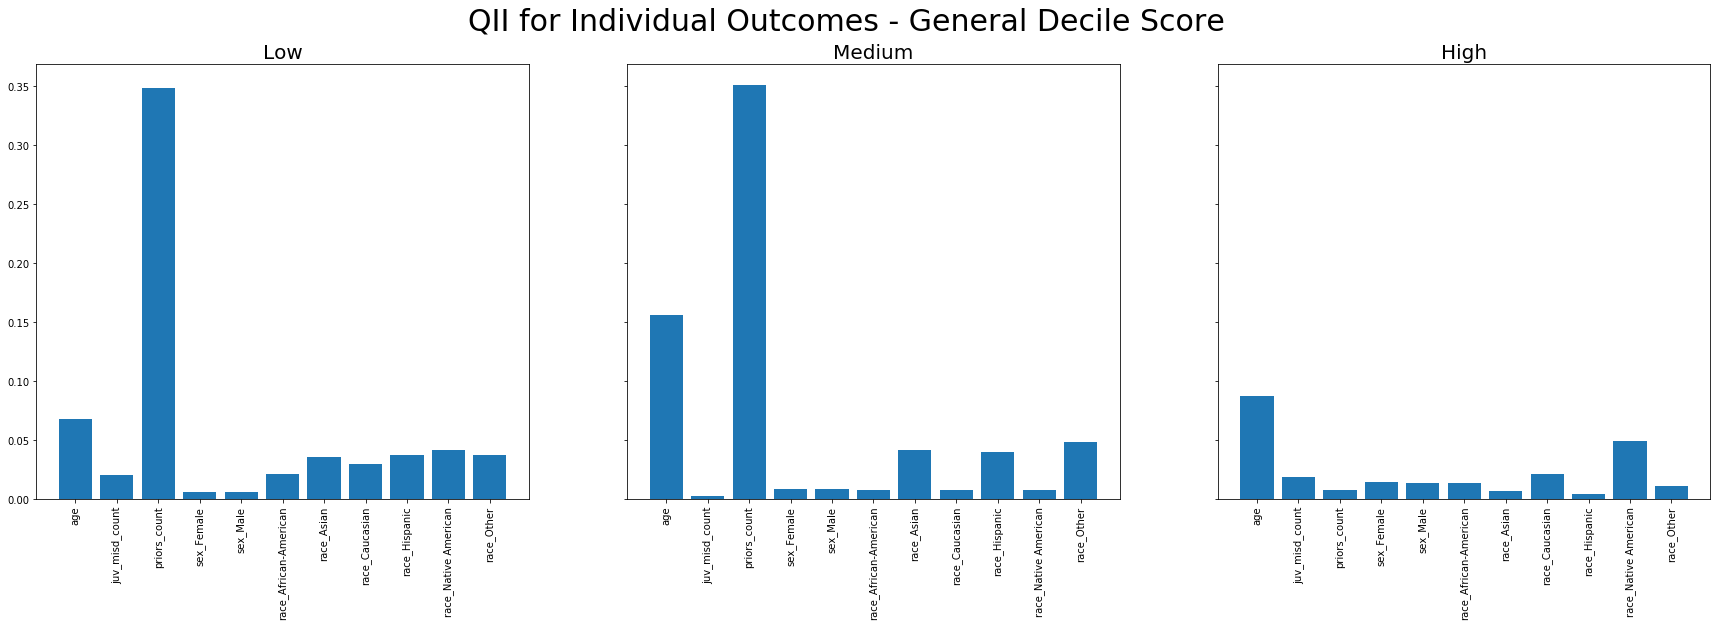

In [11]:
#unary qii influence of individual outcomes by feature and decile score category
genLow, genMed, genHigh = individualOutcomes(test, mG, predictors)
#general decile score
genHist = [genLow, genMed, genHigh]
cat = ['Low', 'Medium', 'High']
fig1, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(genLow)), genHist[i])
    ax.set_xticks(range(len(predictors)))
    ax.set_xticklabels(predictors, rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('QII for Individual Outcomes - General Decile Score', fontsize = 30)
plt.show()

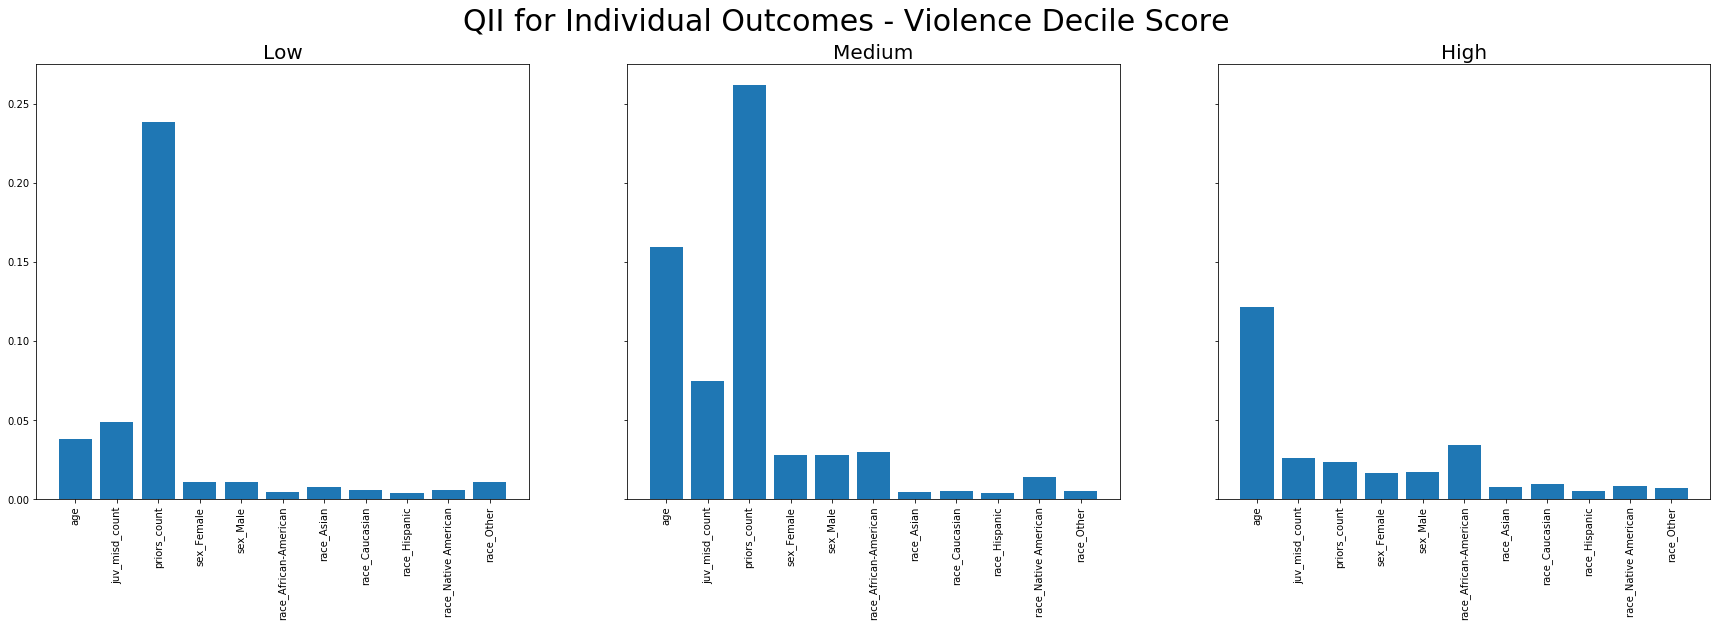

In [12]:
#Violence Decile Score
vLow, vMed, vHigh = individualOutcomes(test, mV, predictors)
vHist = [vLow, vMed, vHigh]
fig2, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(vLow)), vHist[i])
    ax.set_xticks(range(len(predictors)))
    ax.set_xticklabels(predictors, rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('QII for Individual Outcomes - Violence Decile Score', fontsize = 30)
plt.show()

## II. Unary QII for Group Disparity

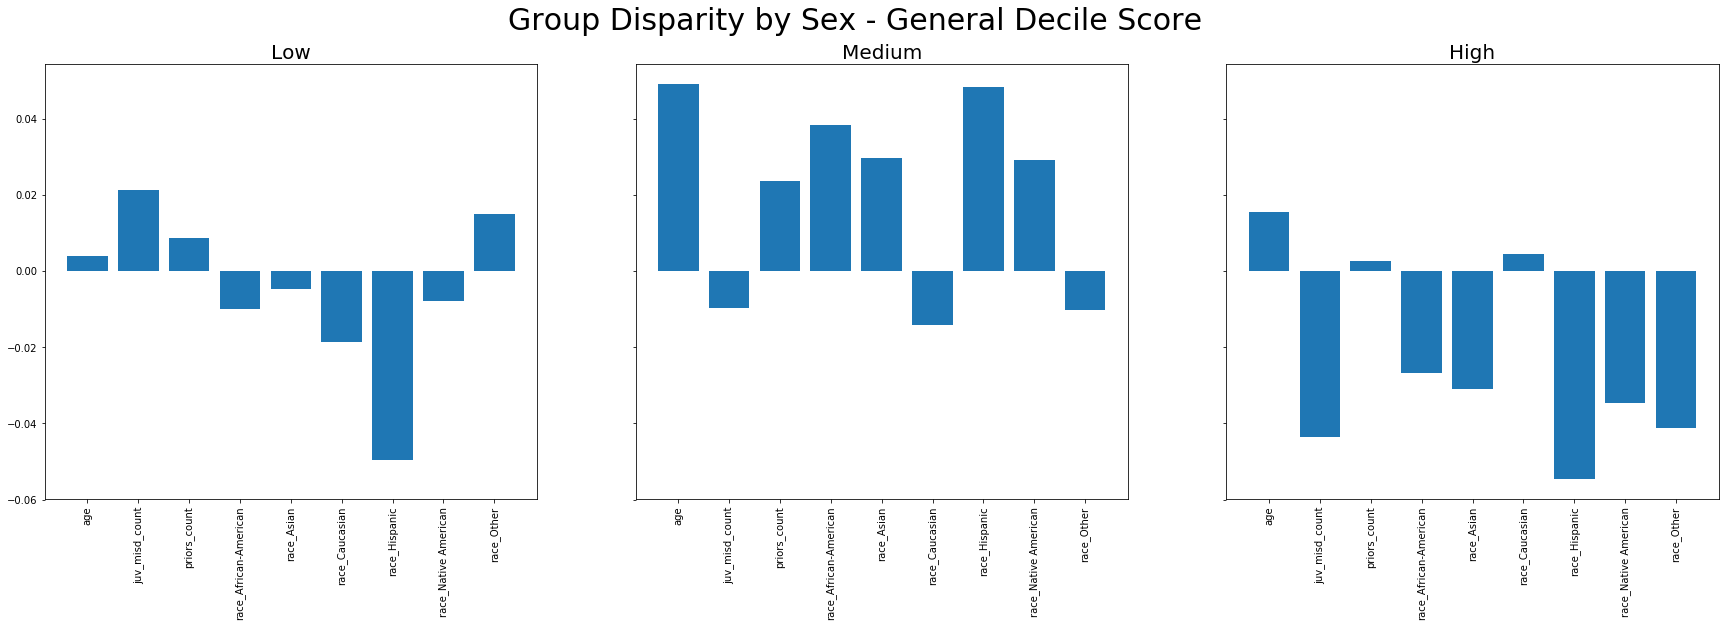

In [13]:
#group disparity by sex - general decile score
sexLowG, sexMediumG, sexHighG, sexLabels = groupDisparity(mG, test, 'sex', 'sex_Male', predictors)
#visualization
sexHistG = [sexLowG, sexMediumG, sexHighG]
fig3, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(sexLabels)), sexHistG[i])
    ax.set_xticks(range(len(sexLabels)))
    ax.set_xticklabels(sexLabels, rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Group Disparity by Sex - General Decile Score', fontsize = 30)
plt.show()

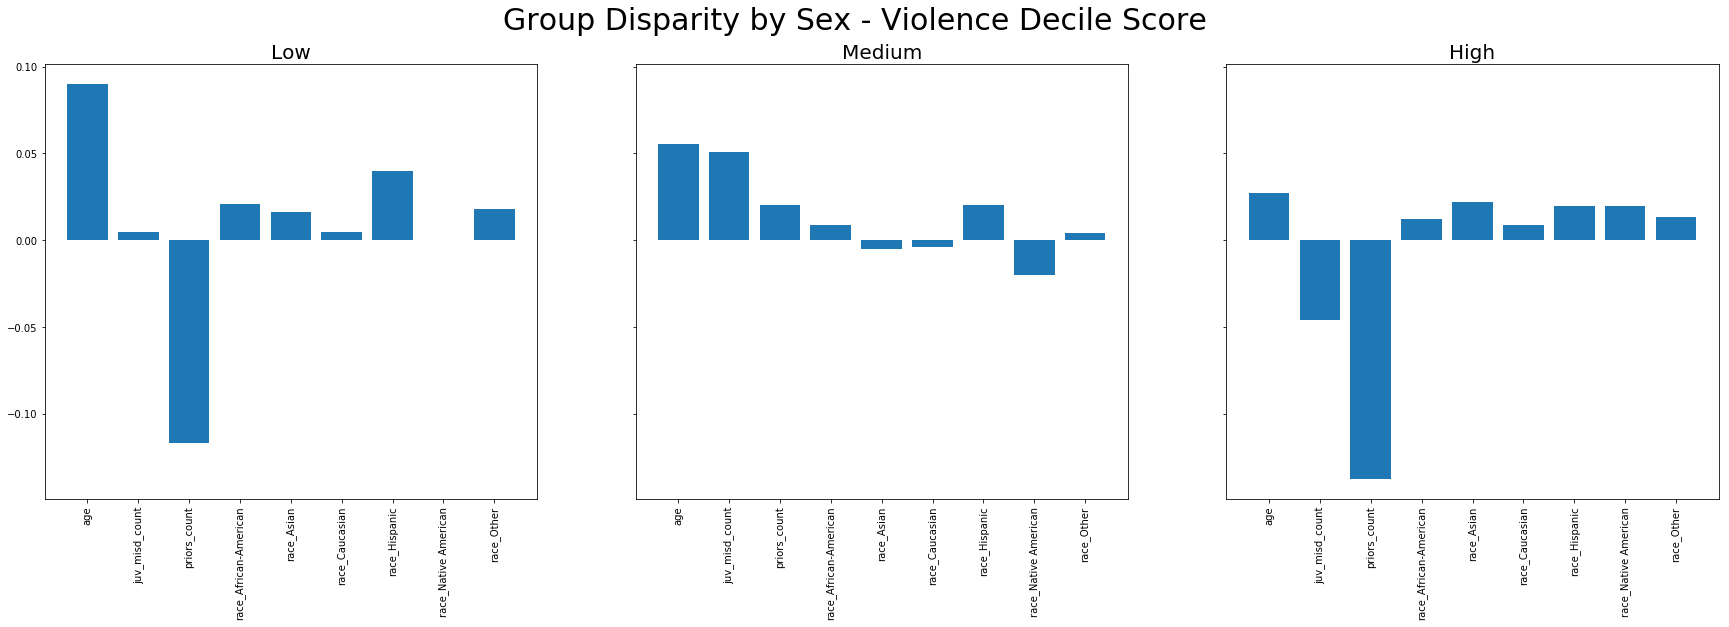

In [14]:
#group disparity by sex - violence decile score
sexLowG_v, sexMediumG_v, sexHighG_v, sexLabels_v = groupDisparity(mV, test, 'sex', 'sex_Male', predictors)
#visualization
sexHistG_v = [sexLowG_v, sexMediumG_v, sexHighG_v]
fig4, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(sexLabels_v)), sexHistG_v[i])
    ax.set_xticks(range(len(sexLabels_v)))
    ax.set_xticklabels(sexLabels_v , rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Group Disparity by Sex - Violence Decile Score', fontsize = 30)
plt.show()

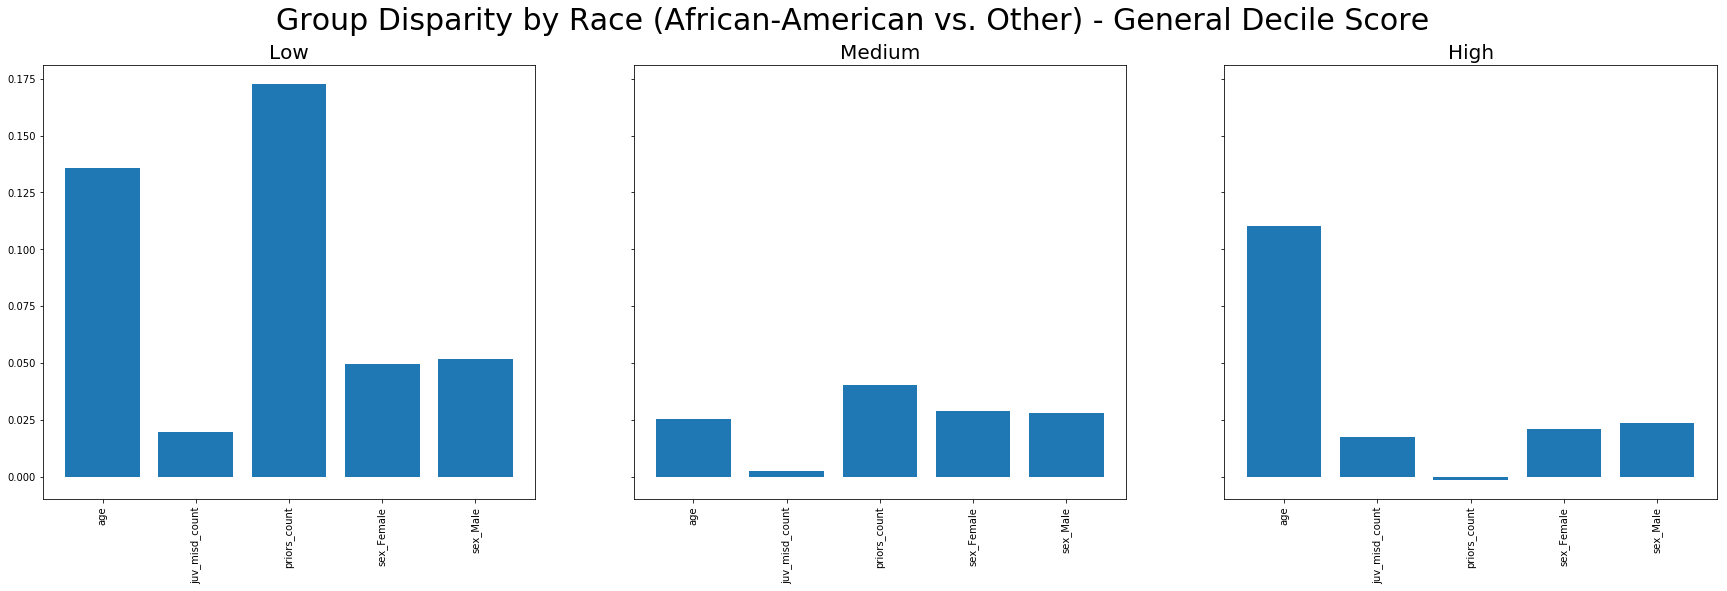

In [15]:
#group disparity by race-African-American - general decile score
raceLowG_AA, raceMediumG_AA, raceHighG_AA, raceLabels_AA = groupDisparity(mG, test, 'race', 'race_African-American', predictors)
#visualization
raceHistG_AA = [raceLowG_AA, raceMediumG_AA, raceHighG_AA]
fig5, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(raceLabels_AA)), raceHistG_AA[i])
    ax.set_xticks(range(len(raceLabels_AA)))
    ax.set_xticklabels(raceLabels_AA , rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Group Disparity by Race (African-American vs. Other) - General Decile Score', fontsize = 30)
plt.show()

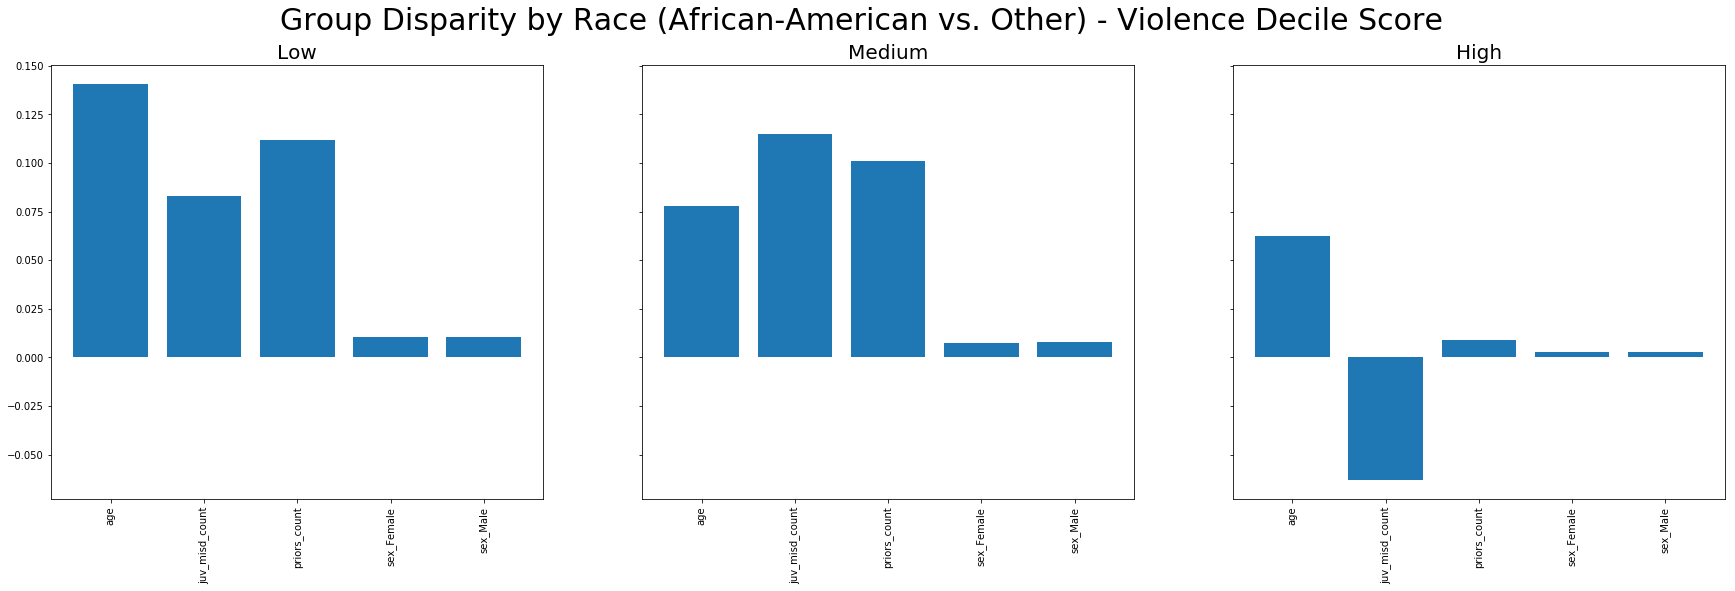

In [16]:
#group disparity by race-African-American - violence decile score
raceLowG_AA_v, raceMediumG_AA_v, raceHighG_AA_v, raceLabels_AA_v = groupDisparity(mV, test, 'race', 'race_African-American', predictors)
#visualization
raceHistG_AA_v = [raceLowG_AA_v, raceMediumG_AA_v, raceHighG_AA_v]
fig6, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(raceLabels_AA_v)), raceHistG_AA_v[i])
    ax.set_xticks(range(len(raceLabels_AA_v)))
    ax.set_xticklabels(raceLabels_AA_v, rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Group Disparity by Race (African-American vs. Other) - Violence Decile Score', fontsize = 30)
plt.show()

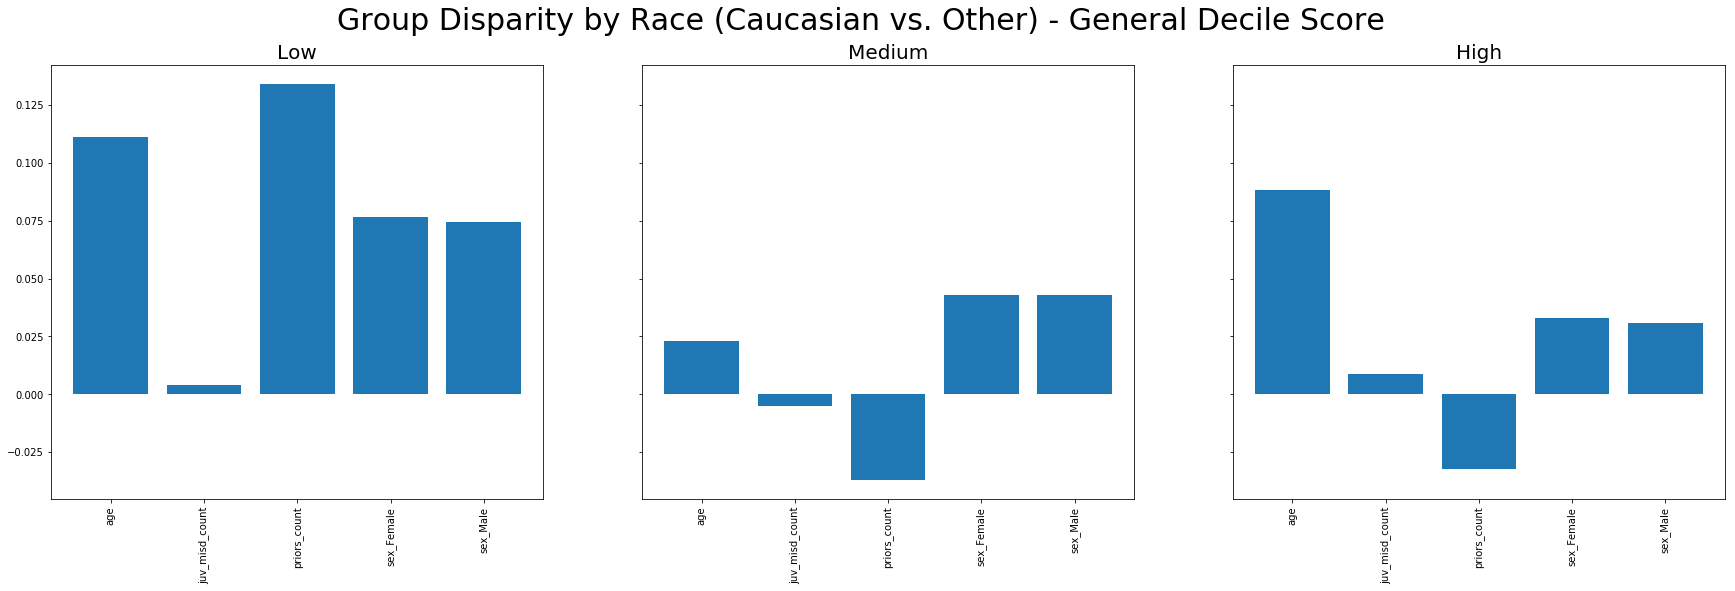

In [11]:
#group disparity by race-Caucasian - general decile score
raceLowG_C, raceMediumG_C, raceHighG_C, raceLabels_C = groupDisparity(mG, test, 'race', 'race_Caucasian', predictors)
#visualization
raceHistG_C = [raceLowG_C, raceMediumG_C, raceHighG_C]
cat = ['Low', 'Medium', 'High']
fig5, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(raceLabels_C)), raceHistG_C[i])
    ax.set_xticks(range(len(raceLabels_C)))
    ax.set_xticklabels(raceLabels_C , rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Group Disparity by Race (Caucasian vs. Other) - General Decile Score', fontsize = 30)
plt.show()

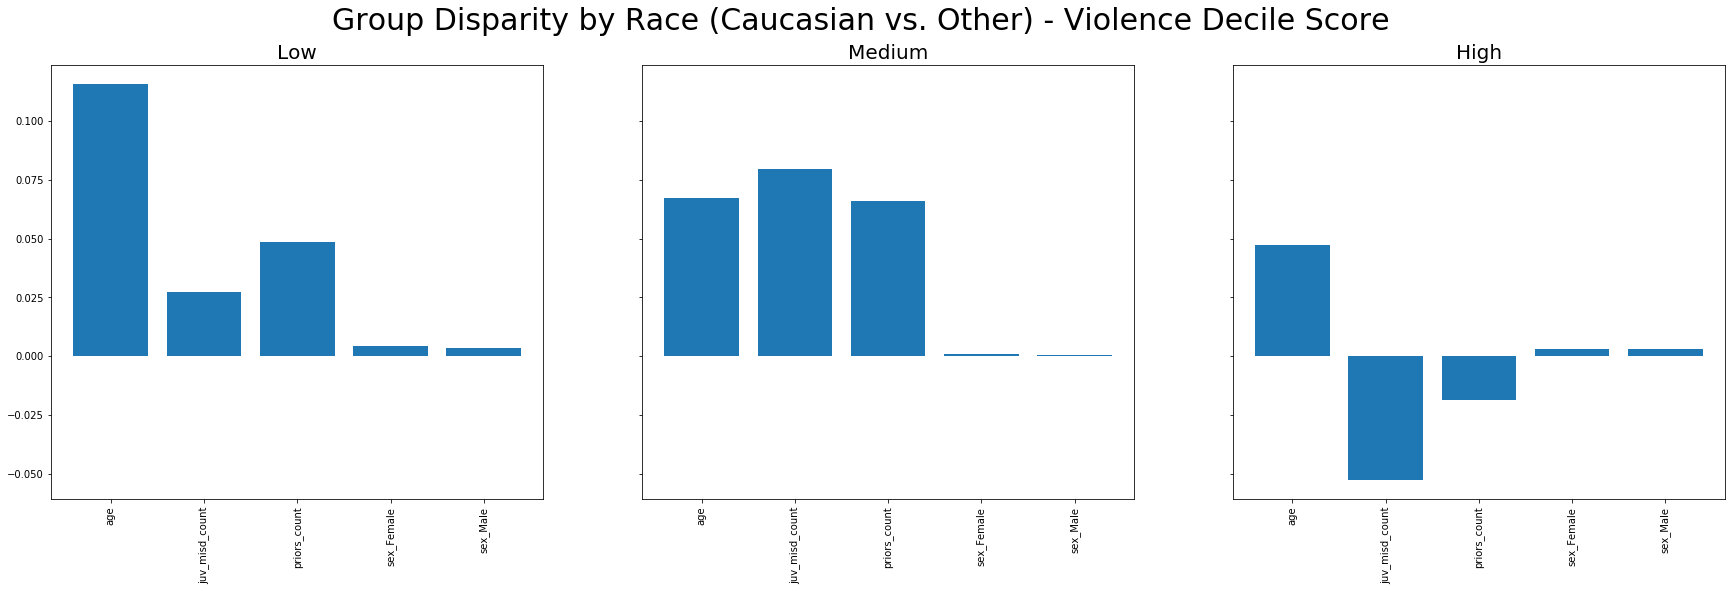

In [12]:
#group disparity by race-Caucasian - violence decile score
raceLowG_C_v, raceMediumG_C_v, raceHighG_C_v, raceLabels_C_v = groupDisparity(mV, test, 'race', 'race_Caucasian', predictors)
#visualization
raceHistG_C_v = [raceLowG_C_v, raceMediumG_C_v, raceHighG_C_v]
fig5, axes = plt.subplots(1, 3, figsize = (30, 8), sharey = True)
for i, ax in enumerate(axes.flat):
    ax.bar(range(len(raceLabels_C_v)), raceHistG_C_v[i])
    ax.set_xticks(range(len(raceLabels_C_v)))
    ax.set_xticklabels(raceLabels_C_v , rotation = 90)
    ax.set_title(cat[i], fontsize = 20)
plt.suptitle('Group Disparity by Race (Caucasian vs. Other) - Violence Decile Score', fontsize = 30)
plt.show()